# importing libraries

In [20]:
import pandas as pd

In [21]:
trans_data=pd.read_excel('KPMG.xlsx',sheet_name='Transactions')

In [22]:
trans_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [23]:
trans_data.shape

(20000, 13)

In [24]:
trans_data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [25]:
trans_data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# Missing value imputation

In [26]:
trans_data['online_order'][trans_data['online_order'].isnull()]=1.0

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
trans_data['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [28]:
trans_data['brand'][trans_data['brand'].isnull()]='Solex'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
trans_data['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [30]:
trans_data['product_line'][trans_data['product_line'].isnull()]='Standard'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
trans_data['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [32]:
trans_data['product_class'][trans_data['product_class'].isnull()]='medium'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
trans_data['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [34]:
trans_data['product_size'][trans_data['product_size'].isnull()]='medium'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


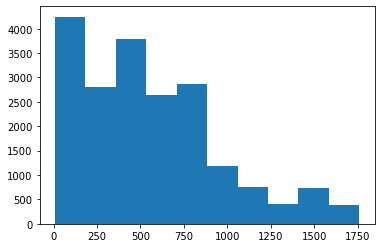

In [35]:
import matplotlib.pyplot as plt
plt.hist(trans_data['standard_cost'])
plt.show()

In [36]:
trans_data['standard_cost'][trans_data['standard_cost'].isnull()]=trans_data['standard_cost'].median()

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Data Preprocessing

In [37]:
columns=list(trans_data)

In [38]:
for i in columns:    
    print(f'{i}:{len(trans_data[i].unique())}')

transaction_id:20000
product_id:101
customer_id:3494
transaction_date:364
online_order:2
order_status:2
brand:6
product_line:4
product_class:3
product_size:3
list_price:296
standard_cost:103
product_first_sold_date:101


In [39]:
trans_data['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [40]:
trans_data['product_first_sold_date']=pd.to_datetime(trans_data['product_first_sold_date'])

In [41]:
trans_data['product_first_sold_date']

0       1970-01-01 00:00:00.000041245
1       1970-01-01 00:00:00.000041701
2       1970-01-01 00:00:00.000036361
3       1970-01-01 00:00:00.000036145
4       1970-01-01 00:00:00.000042226
                     ...             
19995   1970-01-01 00:00:00.000037823
19996   1970-01-01 00:00:00.000035560
19997   1970-01-01 00:00:00.000040410
19998   1970-01-01 00:00:00.000038216
19999   1970-01-01 00:00:00.000036334
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

In [42]:
trans_data['profit']=trans_data['list_price']-trans_data['standard_cost']

In [43]:
trans_data['profit']

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Name: profit, Length: 20000, dtype: float64

# Customer Demographic Data

In [44]:
cust_data=pd.read_excel('KPMG.xlsx',sheet_name='CustomerDemographic')

In [45]:
cust_data.shape

(4000, 13)

In [46]:
cust_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [47]:
cust_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [48]:
cust_data.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

# Missing value imputation

In [49]:
cust_data['last_name'][cust_data['last_name'].isnull()]=''

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
cust_data['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [51]:
cust_data['job_industry_category'][cust_data['job_industry_category'].isnull()]='Manufacturing'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
columns=list(cust_data)

In [53]:
for i in columns:    
    print(f'{i}:{len(cust_data[i].unique())}')

customer_id:4000
first_name:3139
last_name:3726
gender:6
past_3_years_bike_related_purchases:100
DOB:3449
job_title:196
job_industry_category:9
wealth_segment:3
deceased_indicator:2
default:91
owns_car:2
tenure:23


In [54]:
cust_data.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

# Data Preprocessing

In [55]:
cust_data['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [56]:
cust_data['gender']=cust_data['gender'].str.replace('Female','F')
cust_data['gender']=cust_data['gender'].str.replace('Femal','F')
cust_data['gender']=cust_data['gender'].str.replace('Male','M')

In [57]:
cust_data['DOB'].sort_values()

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [58]:
import datetime
cust_data['age']=datetime.datetime(2020,7,29)-cust_data['DOB']

In [59]:
import numpy as np
cust_data['age']=cust_data['age']/np.timedelta64(1,'Y')

In [60]:
cust_data['age'].sort_values(ascending=False)

33      176.605954
719      88.768421
1091     84.938089
3409     79.851058
2412     76.968042
           ...    
3778           NaN
3882           NaN
3930           NaN
3934           NaN
3997           NaN
Name: age, Length: 4000, dtype: float64

In [61]:
cust_data=cust_data.drop(cust_data[cust_data['age']>175].index,axis=0)

In [62]:
cust_data['default']

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 3999, dtype: object

In [63]:
cust_data=cust_data.drop('default',axis=1)

# Customer Address Data

In [64]:
cust_addr=pd.read_excel('KPMG.xlsx',sheet_name='CustomerAddress')

In [65]:
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [66]:
cust_addr.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [67]:
cust_addr.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

# Data Preprocessing

In [68]:
columns=list(cust_addr)

In [69]:
for i in columns:    
    print(f'{i}:{len(cust_addr[i].unique())}')

customer_id:3999
address:3996
postcode:873
state:5
country:1
property_valuation:12


In [70]:
cust_addr['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [71]:
cust_addr['state']=cust_addr['state'].str.replace('New South Wales','NSW')
cust_addr['state']=cust_addr['state'].str.replace('Victoria','VIC')

# New Customers Data

In [72]:
new_cust=pd.read_excel('KPMG.xlsx',sheet_name='NewCustomerList')

In [73]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.76,0.9500,1.1875,1.009375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.07,1.0700,1.3375,1.136875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.56,0.5600,0.5600,0.560000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.61,0.7625,0.7625,0.762500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.48,0.4800,0.6000,0.600000,4,4,1.703125


In [74]:
new_cust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [75]:
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

# Missing value imputation

In [76]:
new_cust['last_name'][new_cust['last_name'].isnull()]=''

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
new_cust=new_cust.dropna()

In [78]:
new_cust['age']=datetime.datetime(2020,7,29)-new_cust['DOB']
new_cust['age']=new_cust['age']/np.timedelta64(1,'Y')
new_cust['age'].sort_values(ascending=False)

797    82.142686
885    82.139948
585    81.915440
191    81.786758
18     81.721048
         ...    
569    18.836800
996    18.782042
475    18.582175
763    18.565747
396    18.530155
Name: age, Length: 735, dtype: float64

In [79]:
new_cust['age']=new_cust['age'].astype('int')

# Data Preprocessing

In [80]:
columns=list(new_cust)

In [81]:
for i in columns:    
    print(f'{i}:{len(new_cust[i].unique())}')

first_name:701
last_name:710
gender:2
past_3_years_bike_related_purchases:99
DOB:720
job_title:178
job_industry_category:9
wealth_segment:3
deceased_indicator:1
owns_car:2
tenure:22
address:735
postcode:442
state:3
country:1
property_valuation:12
Unnamed: 16:71
Unnamed: 17:132
Unnamed: 18:185
Unnamed: 19:294
Unnamed: 20:292
Rank:292
Value:292
age:65


# EDA

In [82]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'old-customers-age-distribuiton')

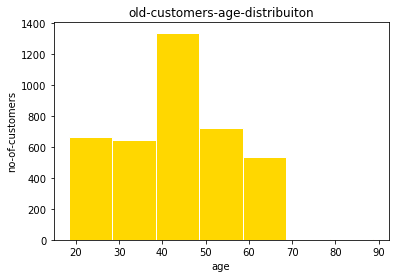

In [83]:
cust_data.hist('age',bins=7,grid=False,color='gold',edgecolor='white')
plt.xlabel('age')
plt.ylabel('no-of-customers')
plt.title('old-customers-age-distribuiton')

#### From above graph we can say that most of our old customers are between age group 30-60

Text(0.5, 1.0, 'new-customers-age-distribuiton')

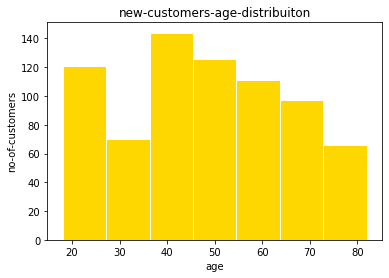

In [84]:
new_cust.hist('age',bins=7,grid=False,color='gold',edgecolor='white')
plt.xlabel('age')
plt.ylabel('no-of-customers')
plt.title('new-customers-age-distribuiton')

#### From above graph we can say that most of our new customers are between age group 40-60

Text(0.5, 1.0, 'old-customer-job-industry-category')

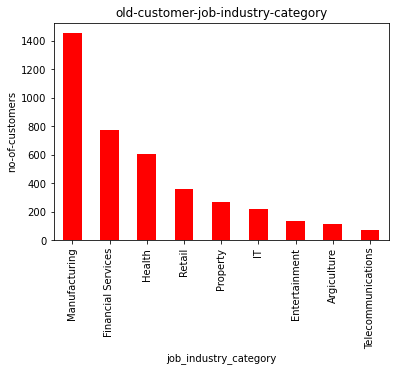

In [85]:
cust_data['job_industry_category'].value_counts().plot(kind='bar',color='red')
plt.xlabel('job_industry_category')
plt.ylabel('no-of-customers')
plt.title('old-customer-job-industry-category')

#### From above graph we can say that most of our old customers are from manfacturing industry and less from telecommunication

Text(0.5, 1.0, 'new-customer-job-industry-category')

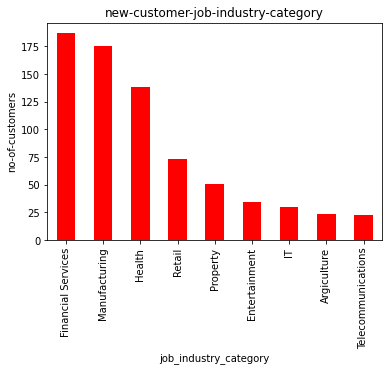

In [86]:
new_cust['job_industry_category'].value_counts().plot(kind='bar',color='red')
plt.xlabel('job_industry_category')
plt.ylabel('no-of-customers')
plt.title('new-customer-job-industry-category')

#### From above graph we can say that most of our new customers are from Financial services industry and less from telecommunication

Text(0.5, 1.0, 'old-customes-wealth-segment')

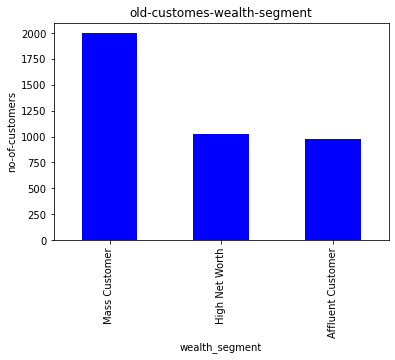

In [87]:
cust_data['wealth_segment'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('wealth_segment')
plt.ylabel('no-of-customers')
plt.title('old-customes-wealth-segment')

#### From above graph we can say that most of our old customers are Mass customers

Text(0.5, 1.0, 'new-customes-wealth-segment')

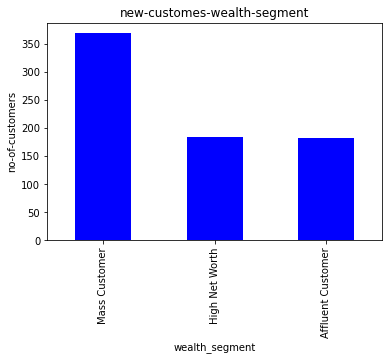

In [88]:
new_cust['wealth_segment'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('wealth_segment')
plt.ylabel('no-of-customers')
plt.title('new-customes-wealth-segment')

Text(0.5, 1.0, 'new-customers-bike-purchase-across-state')

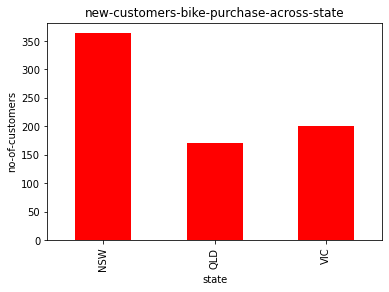

In [89]:
new_cust.groupby(new_cust['state'])['past_3_years_bike_related_purchases'].count().plot(kind='bar',color='red')
plt.xlabel('state')
plt.ylabel('no-of-customers')
plt.title('new-customers-bike-purchase-across-state')

#### From above graph we can say that most of our new customers who purchase bike are from NSW(new south wales)

# RFM Analysis

In [90]:
df=pd.merge(trans_data,cust_data,on='customer_id')

In [91]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.548232
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.548232
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.548232
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,41.482029
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,41.482029


In [92]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

In [93]:
len(df['customer_id'].unique())

3492

# Recency

In [94]:
df['recency']=datetime.datetime(2017,12,30)-df['transaction_date']

In [95]:
df['recency']=df['recency']/np.timedelta64(1,'D')

In [96]:
df['recency']=df['recency'].astype('int')
df['recency']

0        308
1         75
2        248
3        223
4         86
        ... 
19983    331
19984     24
19985    193
19986      4
19987     27
Name: recency, Length: 19988, dtype: int32

In [97]:
final_table=pd.DataFrame()

### Creating Recency,Frequency,Monetary columns

In [98]:
final_table['frequency']=df.groupby(df['customer_id'])['customer_id'].count()

In [99]:
final_table['recency']=df.groupby(df['customer_id'])['recency'].min()

In [100]:
final_table['monetary']=df.groupby(df['customer_id'])['profit'].mean()

In [101]:
final_table.shape

(3492, 3)

In [102]:
final_table.head()

,frequency,recency,monetary
customer_id,,,
1,11,7,274.371818
2,3,128,742.086667
3,8,102,420.351250
4,2,195,110.285000
5,6,16,399.156667


In [103]:
final_table.isnull().sum()

frequency    0
recency      0
monetary     0
dtype: int64

In [104]:
final_table.describe()

,frequency,recency,monetary
count,3492.000000,3492.000000,3492.000000
mean,5.723940,60.795246,551.546864
std,2.325421,57.798132,235.558128
min,1.000000,0.000000,15.080000
25%,4.000000,17.000000,386.776875
50%,6.000000,44.000000,532.538636
75%,7.000000,85.000000,695.662071
max,14.000000,353.000000,1702.550000


In [105]:
import seaborn as sns

C:\Users\Phaneendra\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='recency', ylabel='monetary'>

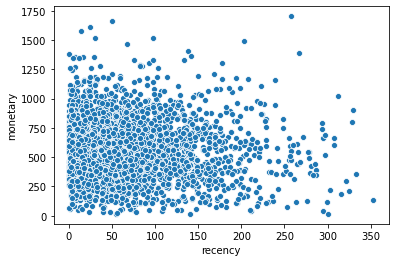

In [147]:
sns.scatterplot(data=final_table,x=final_table['recency'],y=final_table['monetary'])

# K-Means Clustering

In [107]:
from sklearn.cluster import KMeans

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
final_scaled=sc.fit_transform(final_table)

In [109]:
final_scaled=final_table.apply(lambda x: (x-np.mean(x))/(np.std(x)))

In [110]:
final_scaled.head()

,frequency,recency,monetary
customer_id,,,
1,2.269187,-0.930877,-1.176842
2,-1.171543,1.162916,0.809002
3,0.978913,0.713010,-0.557036
4,-1.601634,2.322289,-1.873529
5,0.118731,-0.775140,-0.647025


In [111]:
model=KMeans(n_clusters=6,n_init=40)

In [112]:
model.fit(final_scaled)

KMeans(n_clusters=6, n_init=40)

In [113]:
model.labels_

array([1, 2, 3, ..., 2, 0, 4])

In [114]:
inertia=[]
for i in [2,3,4,5,6,7,8,9]:
    km=KMeans(n_clusters=i,n_init=40)
    km.fit(final_scaled)
    inertia.append(km.inertia_)
    

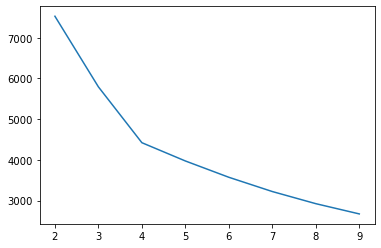

In [115]:
plt.plot([2,3,4,5,6,7,8,9],inertia)
plt.show()

### From the above elbow curve we can say that k=4 is number of optimum clusters

In [135]:
model=KMeans(n_clusters=4,n_init=40)

In [136]:
model.fit(final_scaled)

KMeans(n_clusters=4, n_init=40)

In [137]:
y_kmeans=model.predict(final_scaled)

In [138]:
y_kmeans

array([1, 2, 1, ..., 2, 1, 2])

In [139]:
model.labels_

array([1, 2, 1, ..., 2, 1, 2])

In [140]:
final_table['class']=model.labels_

In [141]:
final_table

,frequency,recency,monetary,class
customer_id,,,,
1,11,7,274.371818,1
2,3,128,742.086667,2
3,8,102,420.351250,1
4,2,195,110.285000,2
5,6,16,399.156667,3
...,...,...,...,...
3496,4,256,511.460000,2
3497,3,52,549.440000,3
3498,6,127,524.555000,2


### Silhouette score

In [142]:
from sklearn.metrics import silhouette_score
score=silhouette_score(final_scaled,model.labels_)

In [143]:
score

0.28848548690259035

### Silhouette score analysis

In [134]:
for i in range(2,10):
    model=KMeans(n_clusters=i,n_init=40)
    model.fit(final_scaled)
    y_kmeans=model.predict(final_scaled)
    final_table['class']=model.labels_
    score=silhouette_score(final_scaled,model.labels_)
    print(f'the no clusters{i} and score is{score}')
    

the no clusters2 and score is0.30779339211465295
the no clusters3 and score is0.2744656815077997
the no clusters4 and score is0.28850694753102224
the no clusters5 and score is0.2762781418597992
the no clusters6 and score is0.24651358464548526
the no clusters7 and score is0.25179409899293886
the no clusters8 and score is0.25884606426951284
the no clusters9 and score is0.2603774292983328


In [144]:
final_table.groupby(final_table['class'])['recency','monetary','frequency'].mean()

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,recency,monetary,frequency
class,,,
0,51.426150,835.735404,4.860775
1,34.419487,539.474359,8.563077
2,170.902196,488.155653,3.792415
3,42.552941,390.866155,4.810084


# Cluster Profiling

In [145]:
final_table['class'][final_table['class']==1]='Champions'
final_table['class'][final_table['class']==3]='Potential_customers'
final_table['class'][final_table['class']==0]='New_customers'
final_table['class'][final_table['class']==2]='At_Risk_Customers'

C:\Users\Phaneendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Analyzing RFM Segmentation

##### Champions are  best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.
##### Potential Loyalists  are  recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.
##### New Customers are  customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.
##### At Risk Customers are  customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

In [146]:
final_table

,frequency,recency,monetary,class
customer_id,,,,
1,11,7,274.371818,Champions
2,3,128,742.086667,At_Risk_Customers
3,8,102,420.351250,Champions
4,2,195,110.285000,At_Risk_Customers
5,6,16,399.156667,Potential_customers
...,...,...,...,...
3496,4,256,511.460000,At_Risk_Customers
3497,3,52,549.440000,Potential_customers
3498,6,127,524.555000,At_Risk_Customers
